In [2]:
[과제]
import pandas as pd
import numpy as np

data = pd.read_csv('dataset/FIFA.csv',engine='python')
data.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


#### FIFA 데이터는 가상의 온라인 축구게임에 등장하는 축구 선수의 주요 특징과 신체 정보에 대한 데이터이다.
- 변수는 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Preferred_Foot', 'Work_Rate', 'Position', 'Jersey_Number', 'Contract_Valid_Until','Height', 'Weight_lb', 'Release_Clause', 'Value', 'Wage'와 같다.

Q1. FIFA데이터에서 각 선수의 키는 Heghit변수에 피트와 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오. 
( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

Q2. 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,“Defender”, “GoalKeeper”로 재범주화하고, 변환하여 Position_Class 라는 변수를 생성하고 저장하시오.

- Forward : ['LS','ST','RS','LW','LF','CF','RF','RW']
- Midfielder : ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
- Defender : ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
- GoalKeeper

Q3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 

Q4) Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에 따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

### 로지스틱 회귀
- 선형회귀 방식을 분류에 적용한 알고리즘. 선형회귀를 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀
- 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정
- 시그모이드 함수의 정의 :  $$y = 1/(1+e^{-x})$$
- 시그모이드 함수는 x값이 아무리 커지거나 작아져도 y값은 항상 0과 1사이의 값을 반환
- x값이 커지면 1에 근사, 작아지면 0에 근사하며 x가 0일때는 0.5

In [26]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# 독립변수 sepat만 가져옴
X = iris.data[50:150,0:2]
X
y = iris.target[50:150]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [11]:
# 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(X,y,test_size=0.25,random_state=2)
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


In [12]:
y_train[:10]

array([1, 1, 2, 2, 2, 2, 1, 1, 1, 1])

In [13]:
X_train_df = pd.DataFrame(
    X_train, columns=['sepal_len','sepal_wid'])
y_train_df = pd.DataFrame({'species':y_train-1})
iris_train_df = pd.concat([y_train_df,X_train_df], axis=1)
iris_train_df

,species,sepal_len,sepal_wid
0,0,5.7,2.8
1,0,6.6,3.0
2,1,6.1,3.0
3,1,6.7,3.3
4,1,6.8,3.0
...,...,...,...
70,0,5.0,2.3
71,0,6.3,2.5
72,1,7.7,2.8
73,0,6.7,3.1


In [15]:
logi_mod_full = smf.glm('species ~ sepal_len + sepal_wid', data=iris_train_df,
                       family=sm.families.Binomial()).fit()

logi_mod_len = smf.glm('species ~ sepal_len', data=iris_train_df,
                       family=sm.families.Binomial()).fit()
logi_mod_wid = smf.glm('species ~ sepal_wid', data=iris_train_df,
                       family=sm.families.Binomial()).fit()
logi_mod_null = smf.glm('species ~ 1', data=iris_train_df,
                       family=sm.families.Binomial()).fit()

# AIC 비교
print('full', logi_mod_full.aic.round(3))
print('len', logi_mod_len.aic.round(3))
print('wid', logi_mod_wid.aic.round(3))
print('null', logi_mod_null.aic.round(3))

full 76.813
len 76.234
wid 92.768
null 105.318


In [16]:
logi_mod_len.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-16.4152,4.000,-4.104,0.000,-24.256,-8.575
sepal_len,2.6478,0.639,4.142,0.000,1.395,3.901


In [18]:
X_test_df = pd.DataFrame(
    X_test, columns = ['sepal_len','sepal_wid'])

# 피팅 예측
logi_fit = logi_mod_len.fittedvalues.round(0)
logi_pred = logi_mod_len.predict(X_test_df).round(0)

# 정답 수
true_train=np.sum(logi_fit == (y_train-1))
true_test = np.sum(logi_pred == (y_test-1))

# 적중률
result_train = true_train / len(y_train)
result_test = true_test / len(y_test)

# 결과출력
print(result_train)
print(result_test)

0.7466666666666667
0.68


[Machine Learning]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()
# df.info()
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size=.3, random_state=10)

In [22]:
from sklearn.metrics import classification_report

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

print('classification report: \n', classification_report(y_test,lr_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.98      0.96      0.97       112

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Q. 'dataset/5_3_fl_100000.csv' 데이터를 data 이름으로 불러와서 다음을 수행하세요. 
- data에서 length 칼럼의 평균과 표준편차를 구하세요.
- 위에서 구한 평균과 표준편차를 적용하여 확률밀도 그래프를 그리세요
- data 모집단의 히스토그램과 정규분포의 확률밀도간의 일치를 시각화해서 표현하세요

In [23]:
data = pd.read_csv('dataset/5_3_fl_100000.csv')
data.head()

,length
0,5.297442
1,3.505566
2,3.572546
3,3.135979
4,4.689275


In [24]:
# A. 평균과 표준편차
data.length.describe()

count    100000.000000
mean          4.000000
std           0.800004
min           0.528488
25%           3.460429
50%           4.000599
75%           4.536513
max           7.335865
Name: length, dtype: float64

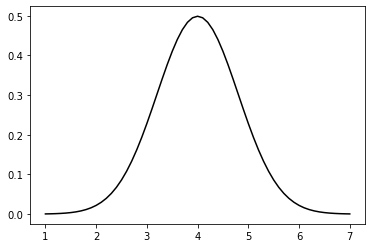

In [28]:
# A. 정규분포의 확률밀도
import seaborn as sns

x = np.arange(1,7.1,0.1)
plt.plot(x,
        sp.stats.norm.pdf(x=x,loc=4,scale=0.8),
        color = 'black')

<AxesSubplot:>

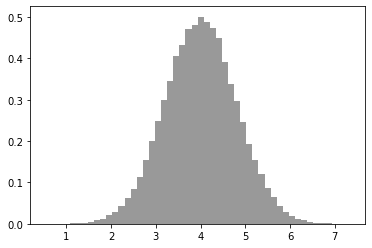

In [29]:
# A. 모집단의 히스토그램
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('dataset/5_3_fl_100000.csv')
data.head()
len(data.length)
# sns.histplot(data, x='length', kde=True)
sns.distplot(data,  kde=False, norm_hist=True, color='black')

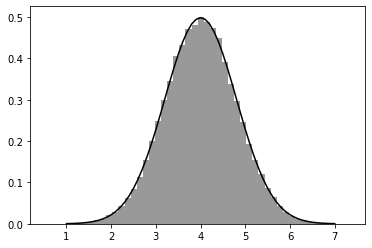

In [31]:
# A. 히스토그램과 확률밀도간 비교

sns.distplot(data, kde=False, norm_hist=True, color= 'black')

x = np.arange(1,7.1,0.1)
plt.plot(x,
        sp.stats.norm.pdf(x=x,loc=4,scale=0.8),
        color = 'black')

[연관성 분석]

- 지지도(support) : 한 거래 항목 안에 A와 B를 동시에 포함하는 거래의 비율. 지지도는 A와 B가 함께 등장할 확률이다. 전체 거래의 수를 A와 B가 동시에 포함된 거래수로 나눠주면 구할 수 있다.
- 신뢰도(confidence) : 항목 A를 포함한 거래 중에서 항목 A와 항목 B가 같이 포함될 확률, 조건부 확률과 비슷하다. 연관성 정도를 파악할 수 있다.. A가 일어났을 때 B의 확률이다. A의 확률을 A와 B가 동시에 포함될 확률로 나눠주면 구할 수 있다. P(A∩B) / P(A) :A와 B가 동시에 일어난 횟수 / A가 일어난 횟수
- 향상도(lift) : A가 주어지지 않을 때의 품목 B의 확률에 비해 A가 주어졌을 때 품목 B의 증가 비율. B의 확률을 A가 일어났을 때 B의 확률로 나눴을 때 구할 수 있다. lift 값은 1이면 서로 독립적인 관계이며 1보다 크면 두 품목이 서로 양의 상관관계, 1보다 작으면 두 품목이 서로 음의 상관관계이다. A와 B가 독립이면 분모, 분자가 같기 때문에 1이 나온다

In [ ]:
!pip install mlxtend

In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [35]:
dataset = [['Milk','Onion','Nutmeg','Eggs','Yogurt'],
          ['Onion','Nutmeg','Eggs','Yogurt'],
          ['Milk','Apple','Eggs'],
          ['Milk','Unicorn','Corn','Yogurt'],
          ['Corn','Onion','Onion','Ice Cream','Eggs']]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary,columns=te.columns_)
df

,Apple,Corn,Eggs,Ice Cream,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,True,False,True,True,True,False,True
1,False,False,True,False,False,True,True,False,True
2,True,False,True,False,True,False,False,False,False
3,False,True,False,False,True,False,False,True,True
4,False,True,True,True,False,False,True,False,False


In [38]:
frequent_items = apriori(df,min_support=0.5,use_colnames=True)
frequent_items

,support,itemsets
0,0.8,(Eggs)
1,0.6,(Milk)
2,0.6,(Onion)
3,0.6,(Yogurt)
4,0.6,"(Eggs, Onion)"
